In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("osc_sheet_11_cleaned_1000.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1004, 31)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,CMIE Expr,CMIE Expr.1,CMIE Expr.2,CMIE Expr.3,CMIE Expr.4,CMIE Expr.5,...,CMIE Expr.17,CMIE Expr.18,CMIE Expr.19,CMIE Expr.20,CMIE Expr.21,CMIE Expr.22,CMIE Expr.23,CMIE Expr.24,CMIE Expr.25,CMIE Expr.26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BSE,BSE,BSE,BSE,BSE,BSE,BSE,BSE,BSE/NSE,BSE/NSE
1,NaN,NaN,NaN,NaN,Quarterly Interim Standalone,Quarterly Interim Standalone,Quarterly Interim Standalone,Quarterly Interim Standalone,Quarterly Interim Standalone,Quarterly Interim Standalone,...,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ,Finance S / Interim SQ
2,NaN,NaN,NaN,NaN,Date,Rs. Crore,Rs. Crore,Rs. Crore,Rs. Crore,Rs. Crore,...,Date,Indian Rupee,Nos.,Rs. Crore,Indian Rupee,Times,Nos.,Rs. Crore,Times,No.
3,NaN,NaN,NaN,NaN,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,...,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023,Jan 2023
4,Company Name,Industry group,ISIN code,NSE symbol,Date,Total income from continuing operations,Net sales,Change in stock,Total expenses,"Raw materials, stocks, spares, purchase of fin...",...,Date,Closing Price,Shares Outstanding,Market Capitalisation,EPS,P/E,Number of Transactions,Enterprise value,Industry P/E,Beta


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   object
 1   Unnamed: 1    1000 non-null   object
 2   Unnamed: 2    1000 non-null   object
 3   Unnamed: 3    987 non-null    object
 4   CMIE Expr     998 non-null    object
 5   CMIE Expr.1   998 non-null    object
 6   CMIE Expr.2   995 non-null    object
 7   CMIE Expr.3   696 non-null    object
 8   CMIE Expr.4   998 non-null    object
 9   CMIE Expr.5   702 non-null    object
 10  CMIE Expr.6   956 non-null    object
 11  CMIE Expr.7   942 non-null    object
 12  CMIE Expr.8   931 non-null    object
 13  CMIE Expr.9   990 non-null    object
 14  CMIE Expr.10  998 non-null    object
 15  CMIE Expr.11  998 non-null    object
 16  CMIE Expr.12  998 non-null    object
 17  CMIE Expr.13  998 non-null    object
 18  CMIE Expr.14  998 non-null    object
 19  CMIE E

In [24]:
df_numeric = df.copy()

for col in df_numeric.columns:
    df_numeric[col] = (
        df_numeric[col]
        .astype(str)
        .str.replace(",", "", regex=False)
    )
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors="coerce")

df_numeric.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   Unnamed: 1    0 non-null      float64
 2   Unnamed: 2    0 non-null      float64
 3   Unnamed: 3    0 non-null      float64
 4   CMIE Expr     0 non-null      float64
 5   CMIE Expr.1   994 non-null    float64
 6   CMIE Expr.2   991 non-null    float64
 7   CMIE Expr.3   692 non-null    float64
 8   CMIE Expr.4   994 non-null    float64
 9   CMIE Expr.5   698 non-null    float64
 10  CMIE Expr.6   952 non-null    float64
 11  CMIE Expr.7   938 non-null    float64
 12  CMIE Expr.8   927 non-null    float64
 13  CMIE Expr.9   986 non-null    float64
 14  CMIE Expr.10  994 non-null    float64
 15  CMIE Expr.11  994 non-null    float64
 16  CMIE Expr.12  994 non-null    float64
 17  CMIE Expr.13  994 non-null    float64
 18  CMIE Expr.14  994 non-null  

In [25]:
missing_pct = df_numeric.isna().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

missing_pct


Unnamed: 0      100.000000
Unnamed: 1      100.000000
Unnamed: 2      100.000000
Unnamed: 3      100.000000
CMIE Expr       100.000000
CMIE Expr.17    100.000000
CMIE Expr.3      31.075697
CMIE Expr.5      30.478088
CMIE Expr.26     12.151394
CMIE Expr.22     10.856574
CMIE Expr.8       7.669323
CMIE Expr.7       6.573705
CMIE Expr.6       5.179283
CMIE Expr.9       1.792829
CMIE Expr.15      1.494024
CMIE Expr.24      1.294821
CMIE Expr.2       1.294821
CMIE Expr.1       0.996016
CMIE Expr.4       0.996016
CMIE Expr.10      0.996016
CMIE Expr.14      0.996016
CMIE Expr.11      0.996016
CMIE Expr.12      0.996016
CMIE Expr.13      0.996016
CMIE Expr.16      0.498008
CMIE Expr.18      0.498008
CMIE Expr.19      0.498008
CMIE Expr.21      0.498008
CMIE Expr.20      0.498008
CMIE Expr.23      0.498008
CMIE Expr.25      0.498008
dtype: float64

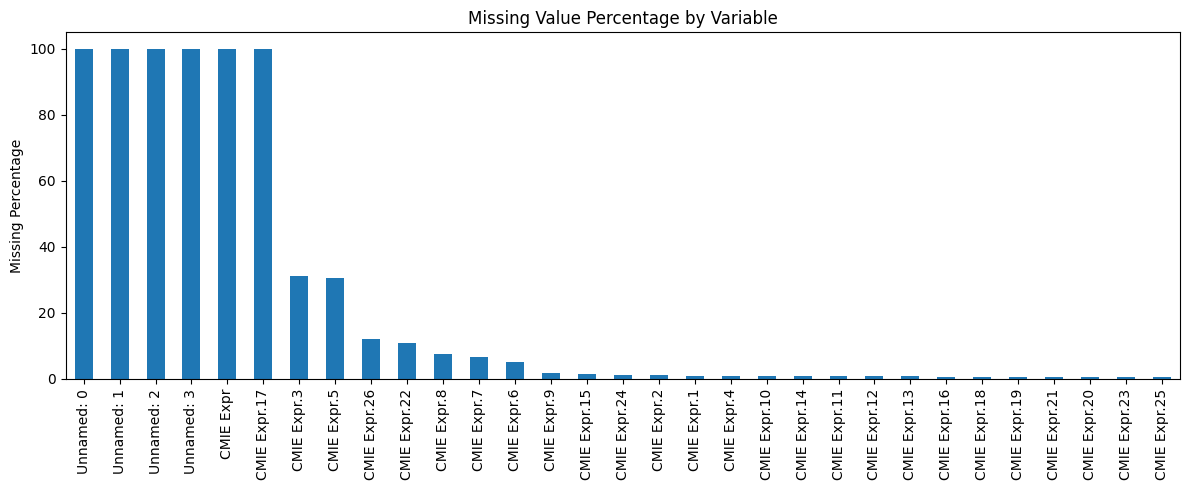

In [26]:
plt.figure(figsize=(12,5))
missing_pct.plot(kind="bar")
plt.ylabel("Missing Percentage")
plt.title("Missing Value Percentage by Variable")
plt.tight_layout()
plt.show()


In [27]:
df_numeric_clean = df_numeric.dropna(axis=1, how="all")
df_imputed = df_numeric_clean.fillna(df_numeric_clean.median())

df_imputed.isna().sum().sum()


np.int64(0)

In [28]:
df_imputed.describe()


,CMIE Expr.1,CMIE Expr.2,CMIE Expr.3,CMIE Expr.4,CMIE Expr.5,CMIE Expr.6,CMIE Expr.7,CMIE Expr.8,CMIE Expr.9,CMIE Expr.10,...,CMIE Expr.16,CMIE Expr.18,CMIE Expr.19,CMIE Expr.20,CMIE Expr.21,CMIE Expr.22,CMIE Expr.23,CMIE Expr.24,CMIE Expr.25,CMIE Expr.26
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000,...,1004.000000,1004.000000,1.004000e+03,1.004000e+03,1004.000000,1004.000000,1004.000000,1.004000e+03,1004.000000,1004.000000
mean,2943.339313,2699.571285,-7.765767,2682.858207,1288.735329,301.378367,77.658785,77.485588,236.01250,245.444741,...,1642.360448,1171.063187,7.453271e+08,2.645465e+04,33.315935,109.934838,2220.750996,2.805406e+04,-71.858357,1.167663
std,12626.624267,11132.175402,222.478396,11873.816454,8263.001397,2029.680502,394.286018,346.725291,1086.62838,1104.976146,...,5857.356697,3868.284771,2.230500e+09,9.101923e+04,74.776760,618.207092,4216.718179,9.808329e+04,957.045739,0.358460
min,0.200000,0.070000,-2991.910000,0.260000,0.200000,0.010000,0.010000,-1373.980000,-7954.00000,-7954.000000,...,0.640000,1.000000,1.454205e+06,1.112207e+03,-197.780488,1.067340,5.000000,-8.065608e+04,-7779.860000,-0.338888
25%,223.042500,212.060000,-2.582500,195.740000,194.785000,1.967500,5.100000,5.515000,14.42000,14.420000,...,216.550000,169.825000,5.430898e+07,2.133758e+03,3.980447,18.587594,460.750000,2.311604e+03,21.130000,0.964643
50%,541.385000,530.270000,1.410000,505.885000,309.510000,6.715000,13.670000,13.140000,39.05500,39.475000,...,538.050000,430.750000,1.499831e+08,5.077370e+03,13.874219,30.744590,1089.000000,5.167171e+03,37.650000,1.163901
75%,1421.392500,1339.835000,7.030000,1311.327500,516.447500,26.007500,32.022500,36.327500,116.96250,124.032500,...,1310.562500,1037.562500,4.127029e+08,1.618564e+04,36.521140,50.539357,2309.000000,1.624157e+04,57.900000,1.395969
max,206455.260000,204740.200000,1748.740000,204209.670000,185176.620000,48547.420000,6661.100000,5253.370000,14205.34000,14205.340000,...,153735.350000,90896.650000,3.211885e+10,1.592647e+06,1347.891359,13075.284991,61355.000000,1.686686e+06,3380.990000,2.914559


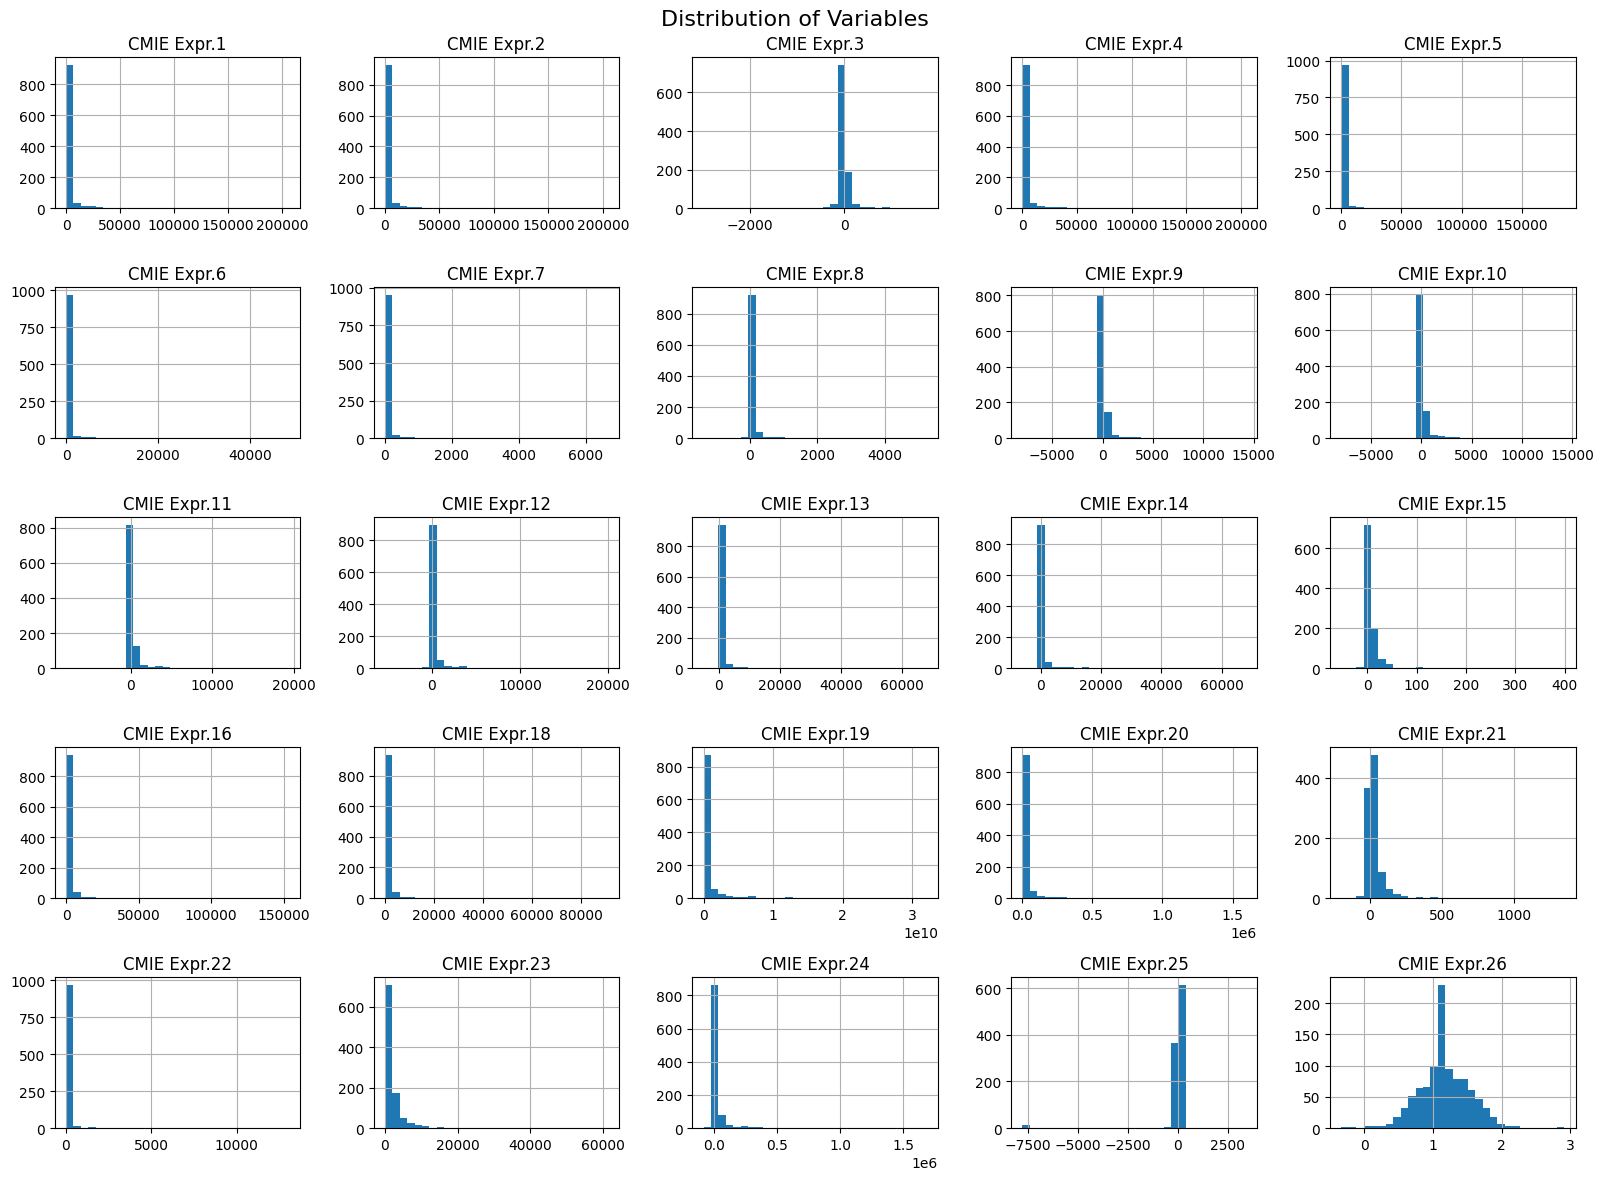

In [29]:
df_imputed.hist(figsize=(16,12), bins=30)
plt.suptitle("Distribution of Variables", fontsize=16)
plt.tight_layout()
plt.show()


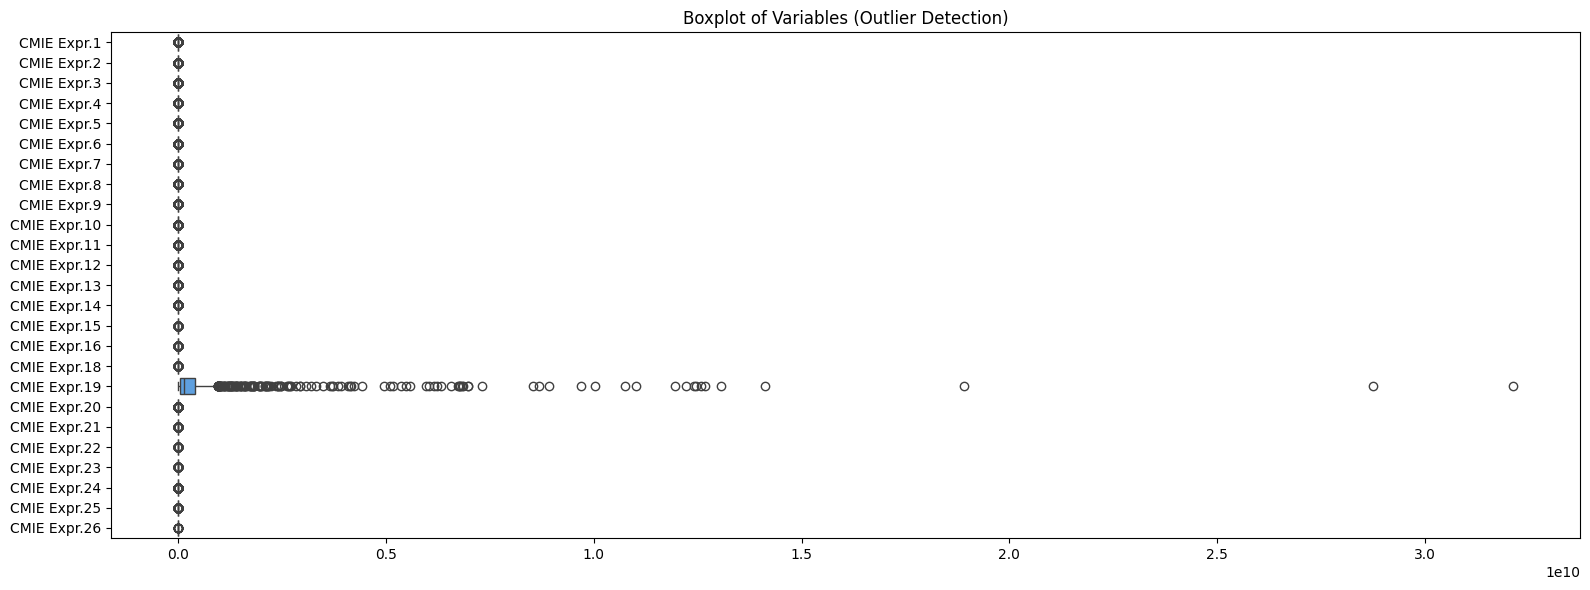

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df_imputed, orient="h")
plt.title("Boxplot of Variables (Outlier Detection)")
plt.tight_layout()
plt.show()


In [33]:
df_ratios = df_imputed.copy()

df_ratios["profit_margin_proxy"] = (
    df_ratios["CMIE Expr.5"] / df_ratios["CMIE Expr.4"]
)

df_ratios["leverage_proxy"] = (
    df_ratios["CMIE Expr.6"] / df_ratios["CMIE Expr.7"]
)

df_ratios["asset_turnover_proxy"] = (
    df_ratios["CMIE Expr.4"] / df_ratios["CMIE Expr.8"]
)

df_ratios[[
    "profit_margin_proxy",
    "leverage_proxy",
    "asset_turnover_proxy"
]].describe()


C:\Users\Brij Tannna\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,profit_margin_proxy,leverage_proxy,asset_turnover_proxy
count,1004.000000,1004.000000,1004.000000
mean,5.777655,26.104146,inf
std,53.311493,164.490297,NaN
min,0.000076,0.000732,-8736.450000
25%,0.446900,0.179728,12.945055
50%,0.646206,0.491222,27.429124
75%,0.816182,1.420846,53.830460
max,1190.423077,3551.384053,inf


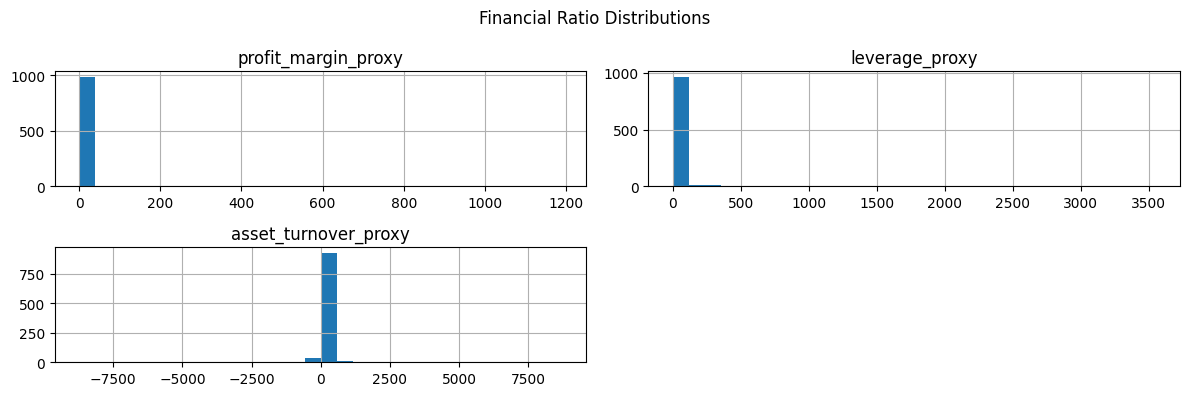

In [35]:
df_ratios.replace([np.inf, -np.inf], np.nan, inplace=True)
ratios_for_plot = df_ratios[[
    "profit_margin_proxy",
    "leverage_proxy",
    "asset_turnover_proxy"
]].dropna()
ratios_for_plot.hist(bins=30, figsize=(12,4))
plt.suptitle("Financial Ratio Distributions")
plt.tight_layout()
plt.show()


In [36]:
corr_matrix = df_ratios[[
    "profit_margin_proxy",
    "leverage_proxy",
    "asset_turnover_proxy"
]].corr()

corr_matrix


,profit_margin_proxy,leverage_proxy,asset_turnover_proxy
profit_margin_proxy,1.000000,0.009981,-0.009697
leverage_proxy,0.009981,1.000000,-0.006975
asset_turnover_proxy,-0.009697,-0.006975,1.000000


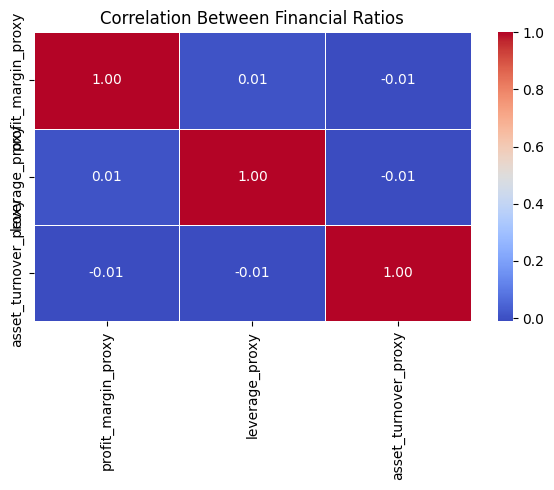

In [37]:
plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Between Financial Ratios")
plt.tight_layout()
plt.show()


In [38]:
final_df = df_ratios[[
    "profit_margin_proxy",
    "leverage_proxy",
    "asset_turnover_proxy"
]]

final_df.head()


,profit_margin_proxy,leverage_proxy,asset_turnover_proxy
0,0.611819,0.491222,38.499619
1,0.611819,0.491222,38.499619
2,0.611819,0.491222,38.499619
3,0.611819,0.491222,38.499619
4,0.611819,0.491222,38.499619
